# Telenor Hackathon

Team ID-MLD-MAL- 002 

Challenge ID - A 

Team Participants - Tan Wern Yi -Digi; Syed Tanveer Ahsan- Grameenphone 

### Project: Prepaid/Postpaid Prediction





##Problem specification-
Business challenge is simple- traditional telco commumication chanel (SMS or Voice) is becoming outdated while acquiring new customers or winback existing customers. However, customers are availble (new/existing) in the digital /online space. 

We need to reach out to them through the digital channel. For this we need to find the answers of the below questions-

Right customer – what is the target segment? New Customer/Churners or high/low value or Prepaid or Postpaid etc. ?
Right channel – Digita social media or News or sports or eCommerce etc.; where the customer is available? 
Right product – What a customer want? Datapack or social pack or voice pack or prepaid or postpaid etc.?
Right time- What is the right time to reach out to customer? When is the highest probability customer willing to buy?
 
To know all these, we need to use Machine learning/ Advanced analytics. To use machine learning, we need customer usage pattern in digital space. Ad-tech company like TAPAD can get this data directly from social media or Website visited by customers; moreover it can uniquely identify a customer using  cross-device analytics.

In the hackathon, our job is to predict a customer whether Prepaid/postpaid based on the data acquired by TAPAD.


Target is to identify the Prepaid/Postpaid Customer. It’s a binary classification problem.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn import metrics
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('processed_hackathon_prepost.csv')
    
# Success
print "recharge dataset has {} data points with {} variables each.".format(*data.shape)
display(data.head(n=5))

recharge dataset has 50000 data points with 37 variables each.


Unnamed: 0                                           TAPAD_ID  URL_LOTTERY  \
0           0  0000bd8099979dca34a34809cfbe538786417792901c97...            0   
1           1  00038c601db2fc8d85cfe7a2dc708c68ee2cf9f1dc42b1...            1   
2           2  0005900f7d4c0c9c2a4da9e9a26109f03ba7deeee9ba4e...            0   
3           3  000627ef60a8f77ca11f734ba79ffbc5a4020f46cc51b2...            0   
4           4  000675789bbd3b0174a14d3d816eaa61212fd25b4fc2ec...            0   

   URL_TRAVEL  URL_SOCIAL  URL_ADTECH  URL_SPORTS  URL_MUSIC  \
0           0           0           0           0        0.0   
1           0           0           0           0        0.0   
2           0           0           0           0        0.0   
3           0           0           0           0        0.0   
4           0           0           0           0        0.0   

   FREQ_CNT_WEEKDAY  FREQ_CNT_DTAC      ...       LATEST_MONTH  PLATFORM  \
0               1.0            1.0      ...                  8    IPHONE   
1              50.0           58.0      ...                 10   ANDROID   
2               0.0            1.0      ...                  8    IPHONE   
3               2.0            2.0      ...                  8   ANDROID   
4               0.0            2.0      ...                  7   ANDROID   

   MARKETING_NAME      MODEL  LAST_DISPLAY_HEIGHT  LAST_DISPLAY_WIDTH  CAMERA  \
0          iPhone     iPhone                  480                 320     2.0   
1  Galaxy Core II   SM-G355H                  800                 480     5.0   
2             NaN        NaN                    0                   0     0.0   
3         V5 Lite       1609                 1280                 720    16.0   
4    Galaxy Grand  GT-I9082L                  800                 480     8.0   

   YEAR RELEASED  LAST_SCREEN_SIZE  ACCT_TYPE_CD  
0           2007               3.5             1  
1           2014               4.5             1  
2              0               0.0             1  
3           2017               5.5             0  
4           2013               5.0             1  

[5 rows x 37 columns]

## Data Preprocessing
Feature Extraction, Drop unnecessary features, Convert Categorical Features into Numerical Features.

In [3]:
# Feature extraction

data['FREQ_CNT_TOTAL'] = data['FREQ_CNT_DTAC']+data['FREQ_CNT_OTHER']+data['FREQ_CNT_WIFI']
data['DTAC_FREQ_PCT'] = data['FREQ_CNT_DTAC']/data['FREQ_CNT_TOTAL']
data['NIGHT_FREQ_PCT'] = data['FREQ_CNT_NIGHT']/data['FREQ_CNT_TOTAL']
data['EVENING_FREQ_PCT'] = data['FREQ_CNT_EVENING']/data['FREQ_CNT_TOTAL']
data['WKD_FREQ_PCT'] = data['FREQ_CNT_WEEKEND']/data['FREQ_CNT_TOTAL']
data['OTHER_FREQ_PCT'] = data ['FREQ_CNT_OTHER']/data['FREQ_CNT_TOTAL']
data['WIFI_FREQ_PCT'] = data ['FREQ_CNT_WIFI']/data['FREQ_CNT_TOTAL']

#URL_ADTECH	URL_ADULT	URL_ECOMMERCE	URL_FASHION	URL_FINANCIAL	URL_HEALTH	URL_INFO	URL_JOB	URL_LOTTERY	URL_MUSIC	URL_NEWS	URL_REAL_E	URL_SOCIAL	URL_SPORTS	URL_SPORTS (1)	URL_TRAVEL	URL_UNCLASSIFIED


In [4]:
# Drop unnecessary features and save target feature.

label = data['ACCT_TYPE_CD']
features_raw = data.drop(['Unnamed: 0','TAPAD_ID','ACCT_TYPE_CD', 'URL_FASHION','URL_INFO','URL_JOB','URL_LOTTERY','URL_TRAVEL','URL_UNCLASSIFIED'],axis=1)
display(label.head(1))
display(features_raw.head(5))
print "features_raw dataset has {} data points with {} variables each.".format(*features_raw.shape)

0    1
Name: ACCT_TYPE_CD, dtype: int64

URL_SOCIAL  URL_ADTECH  URL_SPORTS  URL_MUSIC  FREQ_CNT_WEEKDAY  \
0           0           0           0        0.0               1.0   
1           0           0           0        0.0              50.0   
2           0           0           0        0.0               0.0   
3           0           0           0        0.0               2.0   
4           0           0           0        0.0               0.0   

   FREQ_CNT_DTAC  FREQ_CNT_EVENING  URL_ADULT  URL_NEWS  FREQ_CNT_WEEKEND  \
0            1.0               0.0        0.0       0.0               0.0   
1           58.0              15.0        0.0       0.0              13.0   
2            1.0               1.0        0.0       0.0               1.0   
3            2.0               0.0        0.0       0.0               0.0   
4            2.0               0.0        0.0       0.0               2.0   

       ...        LAST_DISPLAY_WIDTH  CAMERA  YEAR RELEASED  LAST_SCREEN_SIZE  \
0      ...                       320     2.0           2007               3.5   
1      ...                       480     5.0           2014               4.5   
2      ...                         0     0.0              0               0.0   
3      ...                       720    16.0           2017               5.5   
4      ...                       480     8.0           2013               5.0   

   DTAC_FREQ_PCT  NIGHT_FREQ_PCT  EVENING_FREQ_PCT  WKD_FREQ_PCT  \
0       1.000000             0.0          0.000000      0.000000   
1       0.920635             0.0          0.238095      0.206349   
2       1.000000             0.0          1.000000      1.000000   
3       1.000000             0.0          0.000000      0.000000   
4       1.000000             0.0          0.000000      1.000000   

   OTHER_FREQ_PCT  WIFI_FREQ_PCT  
0             0.0       0.000000  
1             0.0       0.079365  
2             0.0       0.000000  
3             0.0       0.000000  
4             0.0       0.000000  

[5 rows x 34 columns]

features_raw dataset has 50000 data points with 34 variables each.


In [5]:
# One-hot encode the 'features_raw' data using pandas.get_dummies()
categorical = ['PLATFORM','MODEL','MARKETING_NAME']

features= pd.get_dummies(features_raw)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

1790 total features after one-hot encoding.


## Data Exploration


### Implementation: Calculate Statistics

- Calculate the count,mean,standard deviation, minimum, maximum and quartile value  of of all features.


In [6]:
#Statistical Data Visualization
display(features.columns)
display(features.describe())

Index([u'URL_SOCIAL', u'URL_ADTECH', u'URL_SPORTS', u'URL_MUSIC',
       u'FREQ_CNT_WEEKDAY', u'FREQ_CNT_DTAC', u'FREQ_CNT_EVENING',
       u'URL_ADULT', u'URL_NEWS', u'FREQ_CNT_WEEKEND',
       ...
       u'MODEL_iPhone 5S', u'MODEL_iPhone 6', u'MODEL_iPhone 6 Plus',
       u'MODEL_iPhone 6S', u'MODEL_iPhone 6S Plus', u'MODEL_iPhone SE',
       u'MODEL_iPod Touch', u'MODEL_iQ Big2', u'MODEL_lphone',
       u'MODEL_myTouch 3G'],
      dtype='object', length=1790)

URL_SOCIAL    URL_ADTECH    URL_SPORTS     URL_MUSIC  \
count  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.201780      0.001100      0.046760      0.076840   
std        2.420649      0.241537      1.526663      4.103905   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000   
max      212.000000     54.000000    165.000000    652.000000   

       FREQ_CNT_WEEKDAY  FREQ_CNT_DTAC  FREQ_CNT_EVENING     URL_ADULT  \
count      50000.000000   50000.000000      50000.000000  50000.000000   
mean          20.636900      18.386100         12.903700      3.208360   
std           96.889078      89.367752         65.256167     42.816549   
min            0.000000       1.000000          0.000000      0.000000   
25%            1.000000       1.000000          0.000000      0.000000   
50%            1.000000       2.000000          1.000000      0.000000   
75%            8.000000       7.000000          4.000000      0.000000   
max         6776.000000    6002.000000       3034.000000   2904.000000   

           URL_NEWS  FREQ_CNT_WEEKEND        ...         MODEL_iPhone 5S  \
count  50000.000000      50000.000000        ...            50000.000000   
mean       0.289500          8.155360        ...                0.000580   
std        4.185303         42.259874        ...                0.024076   
min        0.000000          0.000000        ...                0.000000   
25%        0.000000          0.000000        ...                0.000000   
50%        0.000000          1.000000        ...                0.000000   
75%        0.000000          3.000000        ...                0.000000   
max      530.000000       2916.000000        ...                1.000000   

       MODEL_iPhone 6  MODEL_iPhone 6 Plus  MODEL_iPhone 6S  \
count    50000.000000           50000.0000     50000.000000   
mean         0.000200               0.0001         0.000140   
std          0.014141               0.0100         0.011831   
min          0.000000               0.0000         0.000000   
25%          0.000000               0.0000         0.000000   
50%          0.000000               0.0000         0.000000   
75%          0.000000               0.0000         0.000000   
max          1.000000               1.0000         1.000000   

       MODEL_iPhone 6S Plus  MODEL_iPhone SE  MODEL_iPod Touch  MODEL_iQ Big2  \
count          50000.000000     50000.000000      50000.000000   50000.000000   
mean               0.000120         0.000220          0.000020       0.000760   
std                0.010954         0.014831          0.004472       0.027558   
min                0.000000         0.000000          0.000000       0.000000   
25%                0.000000         0.000000          0.000000       0.000000   
50%                0.000000         0.000000          0.000000       0.000000   
75%                0.000000         0.000000          0.000000       0.000000   
max                1.000000         1.000000          1.000000       1.000000   

       MODEL_lphone  MODEL_myTouch 3G  
count  50000.000000      50000.000000  
mean       0.000020          0.000040  
std        0.004472          0.006324  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        0.000000          0.000000  
max        1.000000          1.000000  

[8 rows x 1790 columns]

In [7]:
display(features.head(1))

URL_SOCIAL  URL_ADTECH  URL_SPORTS  URL_MUSIC  FREQ_CNT_WEEKDAY  \
0           0           0           0        0.0               1.0   

   FREQ_CNT_DTAC  FREQ_CNT_EVENING  URL_ADULT  URL_NEWS  FREQ_CNT_WEEKEND  \
0            1.0               0.0        0.0       0.0               0.0   

         ...         MODEL_iPhone 5S  MODEL_iPhone 6  MODEL_iPhone 6 Plus  \
0        ...                       0               0                    0   

   MODEL_iPhone 6S  MODEL_iPhone 6S Plus  MODEL_iPhone SE  MODEL_iPod Touch  \
0                0                     0                0                 0   

   MODEL_iQ Big2  MODEL_lphone  MODEL_myTouch 3G  
0              0             0                 0  

[1 rows x 1790 columns]

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. 

### Implementation: Define a Performance Metric

For Performance metric, we have used the following-

1. average_precision_score from sklearn.metrics
2. AUC ROC Score from sklearn.metrics
3. accuracy_score, fbeta_score, precision_score from sklearn.metrics

In [8]:
# TODO: Compute average precision (AP) from prediction scores
from sklearn.metrics import average_precision_score

def performance_avg_precision (y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score1 = average_precision_score (y_true, y_predict)    
    # Return the score
    return score1

In [9]:
# TODO: Compute Area Under the Curve (AUC) from prediction scores

from sklearn.metrics import roc_auc_score

def performance_AUC(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score2 = roc_auc_score (y_true, y_predict)    
    # Return the score
    return score2

In [13]:
# Compute accuracy and fscore @ beta = 0.5 score
from sklearn.metrics import accuracy_score, fbeta_score, precision_score

precNaive = precision_score(y_test, naivePredict) 
print ("Precision for Naive Predictor: {}".format(precNaive))
acc = accuracy_score(y_test, naivePredict)
print ("Accuracy for Naive Predictor: {}".format(acc))                          
fscr = fbeta_score(y_test,naivePredict,beta=0.5)
print ("Fbeta0.5 score for Naive Predictor: {}").format(fscr)

Precision for Naive Predictor: 0.642
Accuracy for Naive Predictor: 0.642
Fbeta0.5 score for Naive Predictor: 0.69151227919


#**Model Benchmark**

For benchmark, we have used the following-

1. We have use NaivePredictor as a model benchmark.
2. In the NaivePrediction, we have assumed all customers are prepaid customers.


In [12]:
# Benchmarking the model


naivePredict = []
for i in range(len(y_test)):
    naivePredict.append(1)

print ('Total Naive Prediction done for {} samples\n'.format(len(naivePredict)))

avg_precision_score =  performance_avg_precision (y_test, naivePredict)
AUC_score =  performance_AUC (y_test, naivePredict)

print "Benchmark Prediction based on Average_Precision_Score : %f."% avg_precision_score
print "Benchmark Prediction based on AUC_Score : %f."% AUC_score



Total Naive Prediction done for 10000 samples

Benchmark Prediction based on Average_Precision_Score : 0.642000.
Benchmark Prediction based on AUC_Score : 0.500000.


### Implementation: Shuffle and Split Data
Split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `label` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:

# TODO: Import 'train_test_split'

from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split ( features, label, test_size = 0.20, random_state = 33)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print ('Sample training feature: ')
display(X_train.head(1))

Training set has 40000 samples.
Testing set has 10000 samples.
Sample training feature: 


URL_SOCIAL  URL_ADTECH  URL_SPORTS  URL_MUSIC  FREQ_CNT_WEEKDAY  \
49239           0           0           0        0.0              57.0   

       FREQ_CNT_DTAC  FREQ_CNT_EVENING  URL_ADULT  URL_NEWS  FREQ_CNT_WEEKEND  \
49239           77.0              23.0        0.0       0.0              21.0   

             ...         MODEL_iPhone 5S  MODEL_iPhone 6  MODEL_iPhone 6 Plus  \
49239        ...                       0               0                    0   

       MODEL_iPhone 6S  MODEL_iPhone 6S Plus  MODEL_iPhone SE  \
49239                0                     0                0   

       MODEL_iPod Touch  MODEL_iQ Big2  MODEL_lphone  MODEL_myTouch 3G  
49239                 0              0             0                 0  

[1 rows x 1790 columns]

## Creating a Generic Purpose Training and Predicting Function
The following scores are genrated:
- Training Time
- Prediction Time
- Accuracy Score
- Precision Score
- F0.5 score

Scores on training samples were gerated using 300 samples. For test scores, full test set has been used.

Precision was generated only for test set, as this is a tertiary metric and to be used only to validate quality of positive prediction.

In [14]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time   
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set, then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute AUC score on the first 300 training samples
    results['acc_train'] = accuracy_score (y_train[:300], predictions_train)
        
    # Compute AUC score on test set
    results['acc_test'] = accuracy_score (y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,beta=0.5,average='binary')
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test,beta=0.5,average='binary')
    
    # Compute precision on the test set
    precision = precision_score(y_test,predictions_test, average='binary')
    
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results, and precision score
    return precision, results

# Intial Model selection

Supervised Learning Models Implementation

The following supervised learning models are going to be used:

From SKlearn-
    GradientBoosting Method
    Ensemble Methods- AdaBoost
    Ensemble Methods- Random Forest

From catboost- CatBoostClassifier



In [15]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


# Initialize the three models
#clf_A = model1=CatBoostClassifier(random_seed=33)
clf_A = GradientBoostingClassifier(random_state = 33)
clf_B = AdaBoostClassifier(random_state = 33)
clf_C = RandomForestClassifier(random_state = 33)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train) * 0.01)
samples_10 = int(len(X_train) * 0.1)
samples_100 = int(len(X_train) * 1)


# Collect results on the learners
results = {}
prec = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    prec[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        prec[clf_name][i],results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

GradientBoostingClassifier trained on 400 samples.
GradientBoostingClassifier trained on 4000 samples.
GradientBoostingClassifier trained on 40000 samples.
AdaBoostClassifier trained on 400 samples.
AdaBoostClassifier trained on 4000 samples.
AdaBoostClassifier trained on 40000 samples.
RandomForestClassifier trained on 400 samples.
RandomForestClassifier trained on 4000 samples.
RandomForestClassifier trained on 40000 samples.


## Visualization of Results


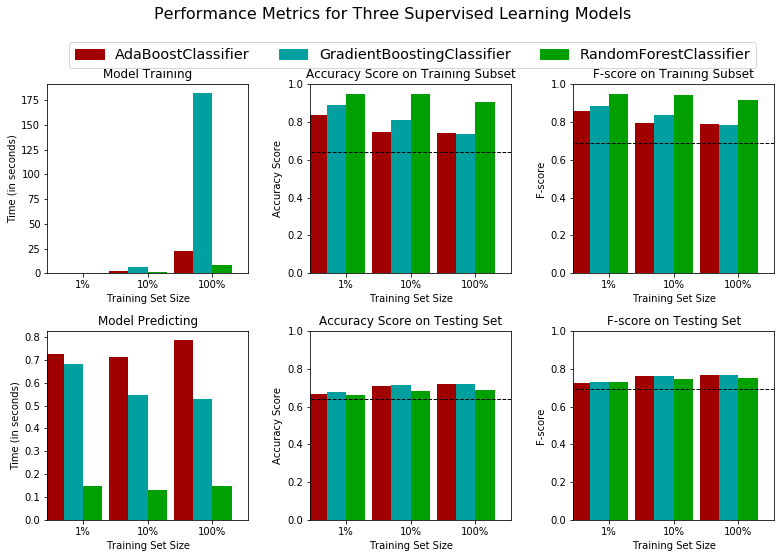

In [16]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, acc, fscr)

# Model Performance on the Data Set

Considering high volume of data, it is required to understand the model performance - Training time, Testing time. To generalize the performane, F-score and Accuracy is used. 

From the visualization, it is clear that RandomForestClassifier has the lowest training & testing time but F-score & Accuracy is lower than GradientBoosting and AdaBoost in the testing data set.

GradientBoosting has the highest training time; It is 7 times slower than AdaBoost in training the model. F-score & Accuracy is very high on training data set. On the testing set, F-score & Accuracy is very good; same as Adaboost.

AdaBoost is quicker than GradientBoosting and very good Accurancy and F-score on test data.

CatBoost is out due to very large training time.

In [17]:
# GradientBossting Model

pred = clf_A.predict_proba(X_test)


#accuracy1 = accuracy_score(y_test, pred[:,1])
avg_precision_score1 = average_precision_score (y_test, pred[:,1])  
auc_score = roc_auc_score(y_test,pred[:,1])

#print accuracy1
print "avg_precision_score: %f."%avg_precision_score1
print "auc_score: %f."%auc_score

avg_precision_score: 0.829363.
auc_score: 0.759452.


In [18]:
# AdaBoost Model
pred2 = clf_B.predict_proba(X_test)


#accuracy2 = accuracy_score(y_test, pred2 [:,1])
avg_precision_score2 = average_precision_score (y_test, pred2 [:,1])  
auc_score2 = roc_auc_score(y_test,pred2 [:,1])

#print accuracy2
print "avg_precision_score: %f."%avg_precision_score2
print "auc_score: %f."%auc_score2

avg_precision_score: 0.829125.
auc_score: 0.758152.


In [19]:
# RandomForest Model
pred2 = clf_C.predict_proba(X_test)


#accuracy2 = accuracy_score(y_test, pred2)
avg_precision_score2 = average_precision_score (y_test, pred2[:,1])  
auc_score2 = roc_auc_score(y_test,pred2[:,1])

#print accuracy2
print "avg_precision_score: %f."%avg_precision_score2
print "auc_score: %f."%auc_score2

avg_precision_score: 0.778206.
auc_score: 0.710879.


## Model Performance on Average Precision Score & AUC Score

i. Gradient Boosting Model -
    avg_precision_score: 0.829363.
              auc_score: 0.759452.

ii. AdaBoost Model-
    avg_precision_score: 0.829125.
              auc_score: 0.758152.

iii. RandomForest Model-
    avg_precision_score: 0.778206.
              auc_score: 0.710879.

Both Gradient Boosting & Adaboost has a superior AUC score & Average Precision Score. But GradientBoosting algorithm is 7 times slower than Adaboosting which will have a high impact on very large dataset like TAPAD data set.



## **Primary Selection of Model:**

AdaBoost Model is chosen for superior Average precision score and AUC score and lower training time. 

i. AdaBoost Model-
    avg_precision_score: 0.829125.
              auc_score: 0.758152.


# ** Cross validation with GridSearch**

We are going to use Crossvalidated Gridsearch technique to find out the final model after evaluating the model performance using Average Precision Score and AUC score.

- Grid search technique- 
It is a process of hyperparameter tuning to find out the optimum result of a Model. Hyperparameter is a parameter of an algorithm. In a grid search, we systematically change the hyperparameter and train the model with a cross validated dataset. After testing each of the models with different hyperparameters, we accumulate the result of all model accuracy, we choose the best model with tuned up hyperparameter.

-  K-fold cross-validation-
It is a technique to create random CV set to test an algorithm. During Grid search, each CV set is tested against each validation point.



In [20]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
# AdaBoost Model Parameter tuning with K-Fold Cross Validation

from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score



# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state = 33)

cv_sets = ShuffleSplit (X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 33)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators' : [50,75,100],'learning_rate' : [1.0,1.25] }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(performance_AUC)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV (clf,parameters,scoring = scorer, cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit (X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_



In [21]:
#Adaboost
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict_proba(X_test)
best_predictions = best_clf.predict_proba(X_test)


# Report the before-and-afterscores
print "Unoptimized model\n------"
print "average_precision score on testing data: {:.4f}".format(average_precision_score(y_test, predictions[:,1]))
print "AUC Score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions[:,1]))
print "\nOptimized Model\n------"
print "Final average_precision score on the testing data: {:.4f}".format(average_precision_score(y_test, best_predictions[:,1]))
print "Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions[:,1]))


Unoptimized model
------
average_precision score on testing data: 0.8291
AUC Score on testing data: 0.7582

Optimized Model
------
Final average_precision score on the testing data: 0.8276
Final AUC on the testing data: 0.7567


In [41]:
auc_score = roc_auc_score(y_test, best_predictions[:,1])
avg_prec_score = average_precision_score(y_test, best_predictions[:,1])
average_score = (auc_score + avg_prec_score)/2
print "Average of AUC Score & Average Precision Score:"
print average_score

Average of AUC Score & Average Precision Score:
0.792130579689


In [22]:
ab_param = grid_fit.best_params_ 
print ab_param

{'n_estimators': 75, 'learning_rate': 1.25}


## Final Model Performance

AdaBoost Model performance-

Unoptimized model
------
average_precision score on testing data: 0.8291
AUC Score on testing data: 0.7582

Optimized Model
------
Final average_precision score on the testing data: 0.8276
Final AUC on the testing data: 0.7567

Benchmark Model
------
Benchmark Prediction based on Average_Precision_Score : 0.642000.
Benchmark Prediction based on AUC_Score : 0.500000.




# Extracting Feature Importance and Visualization¶**

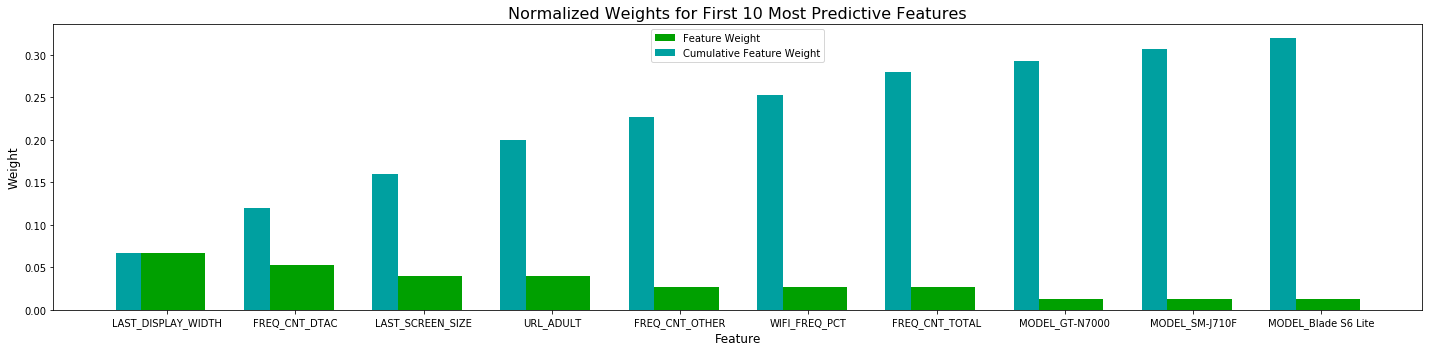

URL_SOCIAL: 0.0
URL_ADTECH: 0.0
URL_SPORTS: 0.0
URL_MUSIC: 0.0
FREQ_CNT_WEEKDAY: 0.0
FREQ_CNT_DTAC: 0.0533333333333
FREQ_CNT_EVENING: 0.0
URL_ADULT: 0.04
URL_NEWS: 0.0133333333333
FREQ_CNT_WEEKEND: 0.0
FREQ_CNT_DAY: 0.0133333333333
FREQ_CNT_NIGHT: 0.0
URL_FINANCIAL: 0.0
FREQ_CNT_WIFI: 0.0
URL_ECOMMERCE: 0.0133333333333
URL_REAL_E: 0.0133333333333
URL_HEALTH: 0.0133333333333
FREQ_CNT_OTHER: 0.0266666666667
FREQ_CNT_TOTAL: 0.0266666666667
LATEST_MONTH: 0.0133333333333
LAST_DISPLAY_HEIGHT: 0.0133333333333
LAST_DISPLAY_WIDTH: 0.0666666666667
CAMERA: 0.0133333333333
YEAR RELEASED: 0.0
LAST_SCREEN_SIZE: 0.04
DTAC_FREQ_PCT: 0.0133333333333
NIGHT_FREQ_PCT: 0.0
EVENING_FREQ_PCT: 0.0133333333333
WKD_FREQ_PCT: 0.0133333333333
OTHER_FREQ_PCT: 0.0133333333333
WIFI_FREQ_PCT: 0.0266666666667
PLATFORM_ANDROID: 0.0
PLATFORM_ANDROIDTABLET: 0.0
PLATFORM_COMPUTER: 0.0133333333333
PLATFORM_FEATUREPHONE: 0.0
PLATFORM_IPAD: 0.0
PLATFORM_IPHONE: 0.0133333333333
PLATFORM_TELEVISION: 0.0
PLATFORM_WINDOWSPHONE: 

MODEL_IQ X3: 0.0
MODEL_IQ Z: 0.0
MODEL_IQ1: 0.0
MODEL_IQX OCCO: 0.0
MODEL_IdeaTab A3000-H: 0.0
MODEL_Internet Explorer - Windows: 0.0
MODEL_Iris 353: 0.0
MODEL_Iris 354: 0.0
MODEL_Iris 360m: 0.0
MODEL_Iris 405+: 0.0
MODEL_Iris 456: 0.0
MODEL_Iris 500: 0.0
MODEL_Iris 505: 0.0
MODEL_Iris 510: 0.0
MODEL_Iris 515: 0.0
MODEL_Iris 550: 0.0
MODEL_Iris 560: 0.0
MODEL_Iris 565: 0.0
MODEL_Iris 600: 0.0
MODEL_Iris 700: 0.0
MODEL_Iris 702: 0.0
MODEL_Iris 708: 0.0
MODEL_Iris 750: 0.0
MODEL_Iris 755: 0.0
MODEL_Iris 800: 0.0
MODEL_Iris 810: 0.0
MODEL_Iris 820: 0.0
MODEL_Iris 870: 0.0
MODEL_JK G9200: 0.0
MODEL_Jerry: 0.0
MODEL_Joey Jet 2: 0.0
MODEL_K1: 0.0
MODEL_K2: 0.0
MODEL_K33b36: 0.0
MODEL_K350: 0.0
MODEL_K520: 0.0
MODEL_K53a48: 0.0
MODEL_K6: 0.0
MODEL_K6000: 0.0
MODEL_K900: 0.0
MODEL_K920: 0.0
MODEL_KII-L22: 0.0
MODEL_KT107: 0.0
MODEL_Kindle Fire: 0.0
MODEL_L102: 0.0
MODEL_L110: 0.0133333333333
MODEL_L26: 0.0
MODEL_L5: 0.0
MODEL_L681M: 0.0
MODEL_LON-L29: 0.0
MODEL_LT18a: 0.0
MODEL_LT25i: 0.0
MODE

In [28]:
# TODO: Extract the feature importances
importances = best_clf.feature_importances_


numerical = features.columns

# Plot
vs.feature_plot(importances, X_train, y_train,10)

for i in range(0,len(numerical)):
    print('{}: {}'.format(numerical[i],importances[i]))

In [42]:
# Import functionality for cloning a model
from sklearn.base import clone

for nFeatures in [25,50,75,100]:
    # Reduce the feature space
    X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:nFeatures]]]
    X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:nFeatures]]]

    # Train on the "best" model found from grid search earlier
    clf = (clone(best_clf)).fit(X_train_reduced, y_train)

    # Make new predictions
    reduced_predictions = clf.predict_proba(X_test_reduced)
    auc_score = performance_AUC (y_test, reduced_predictions[:,1])
    avg_prec_score = average_precision_score (y_test, reduced_predictions[:,1])
    print ("auc_score of AdaBoost_model on test data after reducing feature space: %f." %auc_score)
    print ("average_precision_score of AdaBoost_model on test data after reducing feature space: %f." %avg_prec_score)

auc_score of AdaBoost_model on test data after reducing feature space: 0.751954.
average_precision_score of AdaBoost_model on test data after reducing feature space: 0.818878.
auc_score of AdaBoost_model on test data after reducing feature space: 0.756182.
average_precision_score of AdaBoost_model on test data after reducing feature space: 0.827716.
auc_score of AdaBoost_model on test data after reducing feature space: 0.756678.
average_precision_score of AdaBoost_model on test data after reducing feature space: 0.827583.
auc_score of AdaBoost_model on test data after reducing feature space: 0.756678.
average_precision_score of AdaBoost_model on test data after reducing feature space: 0.827583.


## Result of feature importances

75 features model output-

auc_score of AdaBoost_model on test data after reducing feature space: 0.756678.

average_precision_score of AdaBoost_model on test data after reducing feature space: 0.827583.

We can prepare a model based on 75 important features where we dont have to sacrifice the performance.

## Final Verdict

>There is a different distribution ARPU for prepaid and postpaid users, hence phone variables remain one of the stronger variables. As the data to derive the interest of customers become more nuanced, these dimensional data will probably drop in prediction importance. 

>There are still a lot of missing values due to the vast amount of categorizations of urls needed, and this brings the danger of over fitting. We foresee this being an iterative process where the model improves as we get more data from each customer and sites. We will also see difference in browsing behaviors across regions. 

>Prepaid and postpaid have distinctive behaviors, where some indications do lie within their browsing and device behaviors, as we’ve seen when developing the model. 

>Another set of features that play a role in the influence of their household – where the individuals that surround them can drive their decisions for carrier and plans. We can see or predict these networks via the commonality of their devices, carriers, IP etc. This can also give us an idea of the influencers in our base. 

> However, in this data set, considering the feature importances, it's clear that large display/handset users who visit Adult sites have a tendency to be prepaid users. Seems like data is biased by regional bahavior. 

> We can generate similar result using less features (max. 100 features). 